In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().magic('pylab inline')
#get_ipython().magic('matplotlib auto')

#pylab.rcParams['figure.figsize'] = (12, 8)
#import sys

Populating the interactive namespace from numpy and matplotlib


In [11]:
df = pd.read_csv('input/train_20percent.csv',encoding = 'ISO-8859-1')
df = df.drop(["last_date_primary", "spouse_idx"], axis=1)
df['age']   = pd.to_numeric(df['age'], errors='coerce')
df['seniority']   = pd.to_numeric(df['seniority'], errors='coerce')
#remove negative seniority
df=df[df['seniority']>0]
#save original df as df_save
df_save = df

C:\Users\weichun\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
#"isnull()" is a function that checks if something is NaN or empty. 
#The "~" (tilde) operator negates the following expression. 
#So we are saying give me a dataframe from your original dataframe but only where the 'data' rows are NOT null.
df = df[~df.isnull()]

In [13]:
#df_now[df_now.isnull()]
#df_now.head(10)
df.isnull().sum()


date                            0
id                              0
employee_index                  0
country_residence               0
sex                            16
age                             0
first_join_date                 0
new_customer_index              0
seniority                       0
primary                         0
customer_type                  35
customer_relation              35
residence_idx                   0
foreigner_idx                   0
channel                      5076
deceased                        0
address                         0
province_code               13199
province_name               13199
activity_idx                    0
gross_income               533846
segment                      5902
saving_account                  0
guarantees                      0
current_account                 0
derivada_account                0
payroll_account                 0
junior_account                  0
mas_particular_account          0
particular_acc

In [14]:
df.head(0)
for field in ['customer_type','customer_relation']:
    print(df[field].unique())


[1.0 2.0 3.0 '1.0' '1' '2.0' '2' '3.0' nan '3']
['A' 'I' 'P' nan]


In [15]:
#dropna can remove nan, isnull finds NaN, empty
df = df.dropna(axis=0)
df.head()
df.isnull().sum()

date                       0
id                         0
employee_index             0
country_residence          0
sex                        0
age                        0
first_join_date            0
new_customer_index         0
seniority                  0
primary                    0
customer_type              0
customer_relation          0
residence_idx              0
foreigner_idx              0
channel                    0
deceased                   0
address                    0
province_code              0
province_name              0
activity_idx               0
gross_income               0
segment                    0
saving_account             0
guarantees                 0
current_account            0
derivada_account           0
payroll_account            0
junior_account             0
mas_particular_account     0
particular_account         0
particular_plus_account    0
short-term_deposits        0
medium-term_deposits       0
long-term_deposits         0
e-account     

In [16]:
len(target_cols)

24

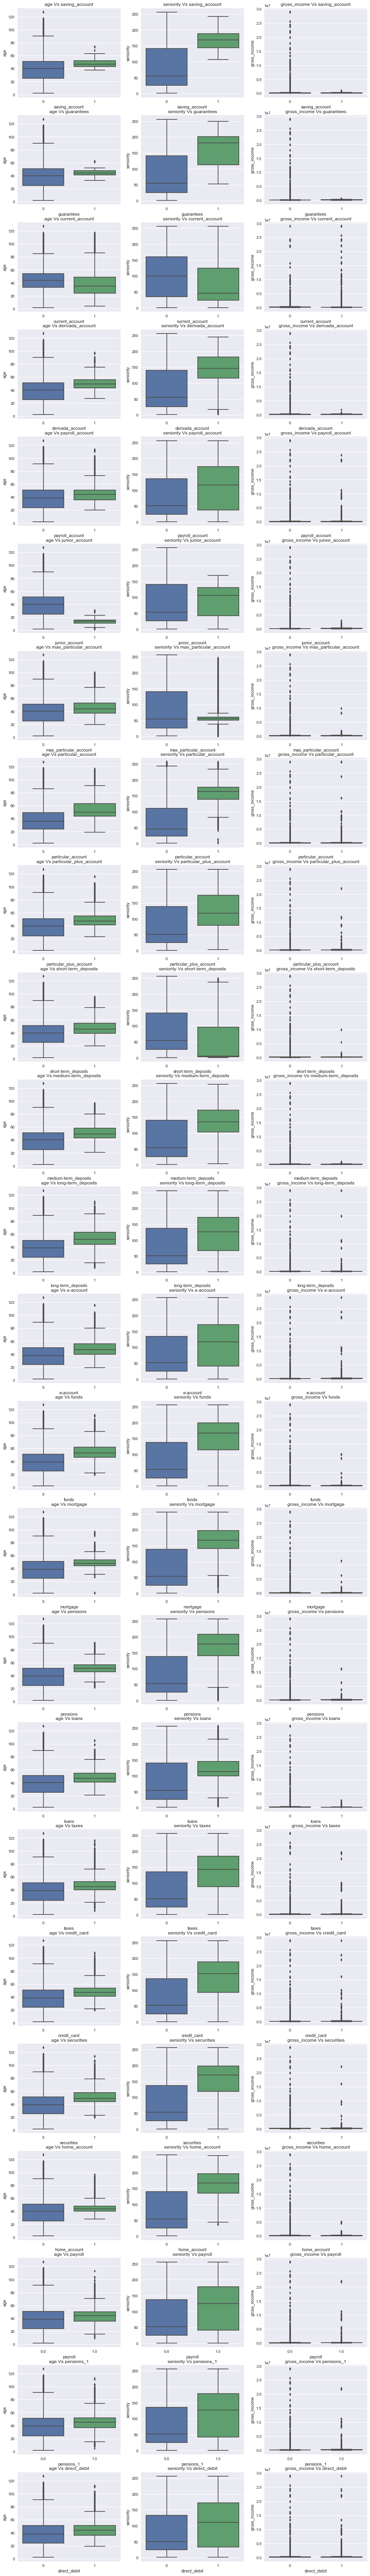

In [17]:
fig = plt.figure(figsize=(16, 120))
target_cols =['saving_account','guarantees', 'current_account', 'derivada_account', 'payroll_account',
       'junior_account', 'mas_particular_account', 'particular_account',
       'particular_plus_account', 'short-term_deposits',
       'medium-term_deposits', 'long-term_deposits', 'e-account', 'funds',
       'mortgage', 'pensions', 'loans', 'taxes', 'credit_card', 'securities',
       'home_account', 'payroll', 'pensions_1', 'direct_debit']

numeric_cols = ['age', 'seniority', 'gross_income']
#for ind1, numeric_col in enumerate(numeric_cols):
plot_count = 0
for ind, target_col in enumerate(target_cols):
    for numeric_col in numeric_cols:
        plot_count += 1
        plt.subplot(24, 3, plot_count)
        sns.boxplot(x=target_col, y=numeric_col, data=df)
        plt.title(numeric_col+" Vs "+target_col)
plt.show()

df.columns
cols_to_transform = [ 'date','employee_index', 'country_residence', 'first_join_date', 'sex', 
'customer_type', 'customer_relation', 'residence_idx', 'foreigner_idx','channel', 'deceased','province_name','segment' ]
#df_with_dummies = pd.get_dummies(df, columns = cols_to_transform )
#df_with_dummies.head()
df2 = df.drop(cols_to_transform, axis=1)

len(df2)